# 1. Data

데이터 불러오기

In [1]:
## 기본 라이브러리 호출
import numpy as np
import pandas as pd

In [2]:
## 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import os
path = "/content/drive/MyDrive/2. 시계열데이터(3.29~3.30)/데이터"

## 1.1 Working with Data (Structures)

Pandas의 read_csv 함수
<ul>
<li> header: 첫 번째 row를 column 명으로 </li>
<li> index_col: 주어진 column을 Dataframe의 인덱스로 </li>
</ul>



In [32]:
datapath = os.path.join(path, 'international-airline-passengers.csv')
## load passenger data set and safe to DataFrame
# datapath = '/content/drive/MyDrive/2. 시계열데이터(3.29~3.30)/데이터/international-airline-passengers.csv'
df = pd.read_csv(datapath, header=None, index_col=0)
df = df.rename(columns={1: 'passengers'}) # column 명과
df = df.rename_axis('month') # 인덱스 명 바꿈

In [33]:
## 맨 처음 3 줄만 read
df.head(3)

,passengers
month,
1949-01,112
1949-02,118
1949-03,132


In [6]:
## Column의 datatype
df.dtypes

passengers    int64
dtype: object

In [7]:
## numerical한 값을 가지는 column에 대한 통계치
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
## Check for missing values
df.isna().sum()

passengers    0
dtype: int64

In [9]:
## Dataframe의 크기: [전체 줄 수, 전체 column 수]
df.shape

(144, 1)

In [10]:
## Dataframe의 인덱스를 추후 api를 위해 datetime 형식으로 바꾸어줌
## 인덱스의 type은 string -> datetime
df.index = pd.to_datetime(df.index, format='%Y-%m')
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

In [11]:
## 단변수 시계열 데이터이므로 y라는 새로운 변수에 pandas Series 생성 
y = df["passengers"]

In [12]:
## 첫 5개 줄
y.head(5)

month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

In [13]:
df.head()

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 1.2 Data visualization

위 ariline-passenger 데이터를 plot하여 확인

In [14]:
## matplot 라이브러리 호출
import matplotlib.pyplot as plt
## Figure detail description
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

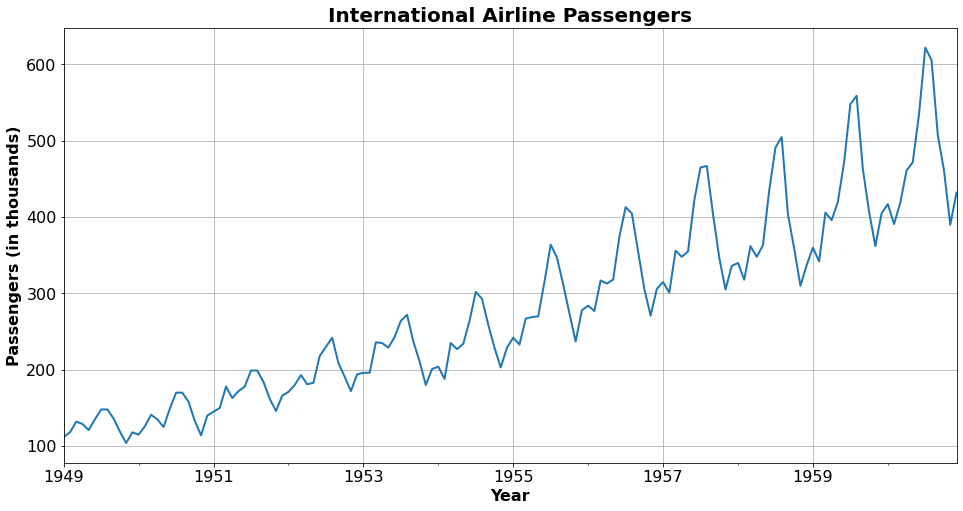

In [15]:
## Figure와 ax 초기화
fig, ax = plt.subplots()

## passengers 로 새로 할당한 y plot
y.plot(ax=ax, grid=True, linewidth=2)

## Style of plot
ax.set_title('International Airline Passengers')
ax.set_ylabel('Passengers (in thousands)')
ax.set_xlabel('Year')
ax.xaxis.set_ticks_position('bottom')

# show the plot
plt.show()

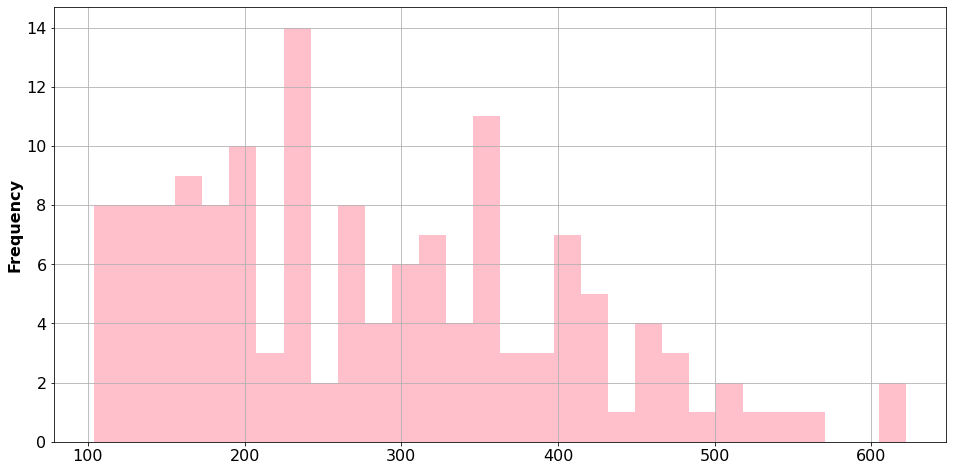

In [16]:
## Plot histogram (frequency of counts), change num of bins to see different plots
y.plot(kind='hist', bins=30, color='pink', grid=True)

## Vacation

In [17]:
import numpy as np
import pandas as pd

In [ ]:
## 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
vacation = pd.read_csv("/content/drive/MyDrive/2. 시계열데이터(3.29~3.30)/데이터/vacation.csv", skiprows=2)
# vacation = pd.read_csv("/content/drive/MyDrive/2. 시계열데이터(3.29~3.30)/데이터/vacation.csv")
vacation.head()

,Month,vacation: (United States)
0,2004-01,94
1,2004-02,89
2,2004-03,86
3,2004-04,79
4,2004-05,89


In [22]:
## Check for missing values
vacation.isna().sum()

Month                        0
vacation: (United States)    0
dtype: int64

In [23]:
## Fix column names
col_names = ['Month','Num_Search_Vacation']
vacation.columns = col_names
vacation.tail()

,Month,Num_Search_Vacation
185,2019-06,58
186,2019-07,56
187,2019-08,45
188,2019-09,38
189,2019-10,37


In [24]:
vacation['Month'] = pd.to_datetime(vacation['Month'])

In [25]:
## Set the 'Month' as index
vacation.set_index('Month', inplace=True)
vacation.head(3)

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86


In [26]:
vacation.describe()

,Num_Search_Vacation
count,190.000000
mean,60.215789
std,15.513461
min,35.000000
25%,50.000000
50%,56.000000
75%,70.000000
max,100.000000


In [27]:
import matplotlib.pyplot as plt

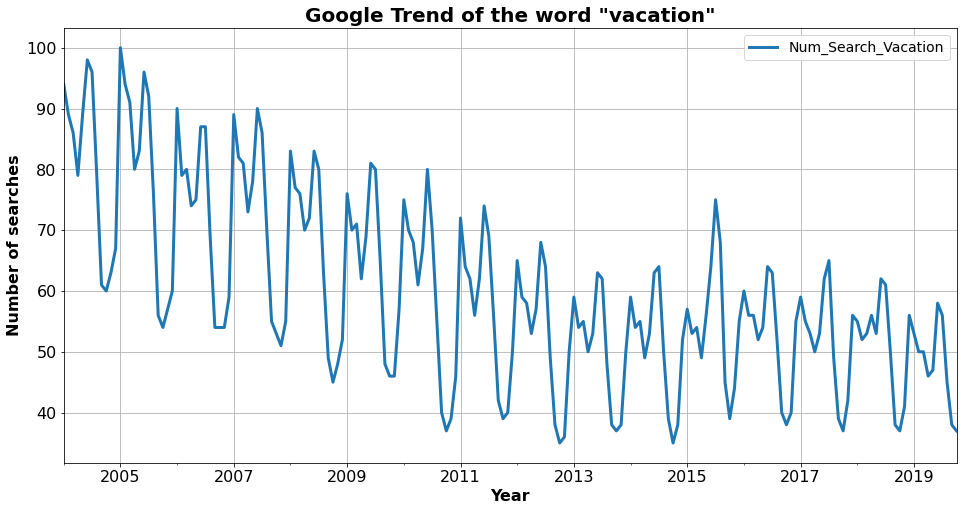

In [28]:
## Figure와 ax 초기화
fig, ax = plt.subplots()

## passengers 로 새로 할당한 y plot
vacation.plot(ax=ax, grid=True, linewidth=3)

## Style of plot
ax.set_title('Google Trend of the word "vacation"')
ax.set_ylabel('Number of searches')
ax.set_xlabel('Year')
ax.xaxis.set_ticks_position('bottom')

# show the plot
plt.show()

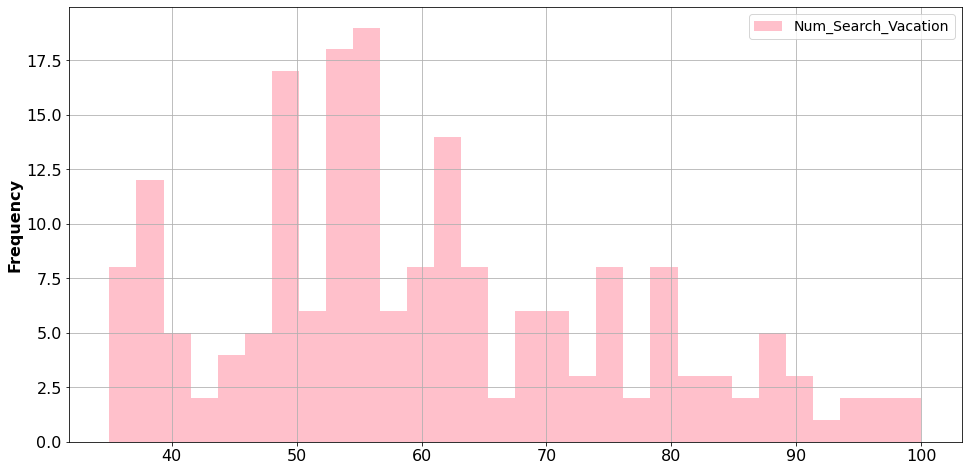

In [29]:
## Plot histogram (frequency of counts), change num of bins to see different plots
vacation.plot(kind='hist', bins=30, color='pink', grid=True)

In [ ]:
vacation.to_csv("/content/drive/MyDrive/Time Series/df_vacation.csv")

## Furnitures

In [ ]:
furniture = pd.read_csv("/content/drive/MyDrive/Time Series/furniture.csv")
furniture.head()

,DATE,MRTSSM442USN
0,1992-01-01,3846
1,1992-02-01,3908
2,1992-03-01,4157
3,1992-04-01,4141
4,1992-05-01,4275


In [ ]:
## Rename columns for ease of reference
col_names = ['Month', 'Millions of Dollars']
furniture.columns = col_names
furniture.head()

,Month,Millions of Dollars
0,1992-01-01,3846
1,1992-02-01,3908
2,1992-03-01,4157
3,1992-04-01,4141
4,1992-05-01,4275


In [ ]:
## Check for any null values
furniture.isna().sum()

Month                  0
Millions of Dollars    0
dtype: int64

In [ ]:
## Convert the Date column to datetime, notice data is in months
furniture['Month'] = pd.to_datetime(furniture['Month'])
## Set index, use inplace=True
furniture.set_index('Month', inplace=True)
furniture.head()

,Millions of Dollars
Month,
1992-01-01,3846
1992-02-01,3908
1992-03-01,4157
1992-04-01,4141
1992-05-01,4275


In [ ]:
furniture.describe()

,Millions of Dollars
count,331.000000
mean,7553.815710
std,1666.744055
min,3846.000000
25%,6484.500000
50%,7651.000000
75%,8794.500000
max,11297.000000


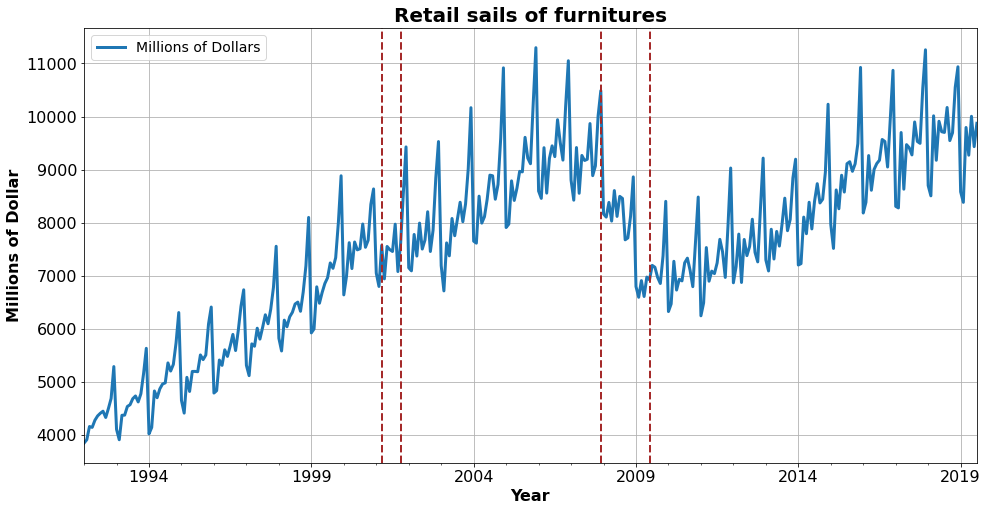

In [ ]:
## Figure와 ax 초기화
fig, ax = plt.subplots()

## passengers 로 새로 할당한 y plot
furniture.plot(ax=ax, grid=True, linewidth=3)

## Style of plot
ax.set_title('Retail sails of furnitures')
ax.set_ylabel('Millions of Dollar')
ax.set_xlabel('Year')
ax.xaxis.set_ticks_position('bottom')

## Add a brown vertical line
ax.axvline('2001-03-01', color='brown', linestyle='--')
ax.axvline('2001-10-01', color='brown', linestyle='--')

ax.axvline('2007-12-01', color='brown', linestyle='--')
ax.axvline('2009-06-01', color='brown', linestyle='--')

# show the plot
plt.show()

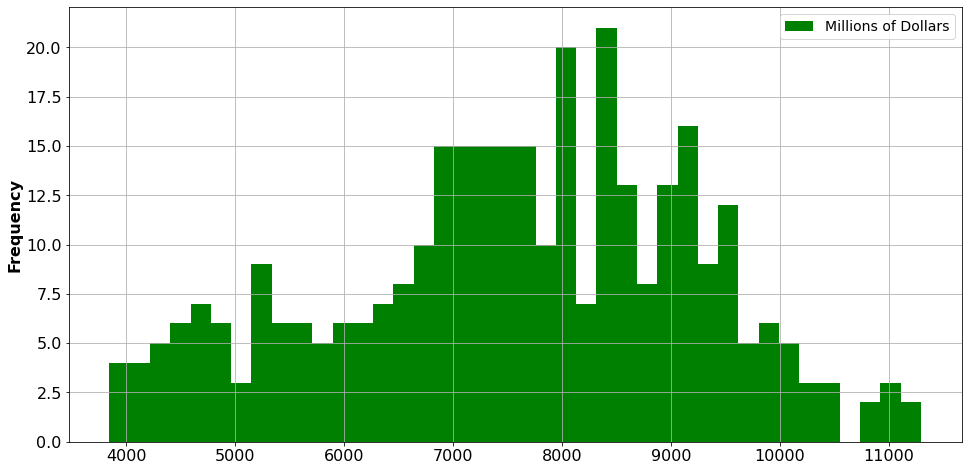

In [ ]:
## Plot histogram (frequency of counts), change num of bins to see different plots
furniture.plot(kind='hist', bins=40, color='green', grid=True)

In [ ]:
furniture.to_csv("/content/drive/MyDrive/Time Series/df_furniture.csv", index=True)